In [1]:
import os 
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(r'D:\AI4EO challenge\train_data\train_data')
%matplotlib inline

In [2]:
data = pd.read_csv('X_train.csv')
print(data)
data = data.drop(columns=['Unnamed: 0'])
data= data.fillna(0)
data = data.interpolate()
data.shape

      Unnamed: 0      Band_1      Band_2      Band_3      Band_4      Band_5  \
0              0  450.139241  450.822785  446.810127  454.455696  466.075949   
1              1  553.833333  552.025641  545.397436  553.897436  563.628205   
2              2  422.551282  419.525641  414.871795  423.500000  433.717949   
3              3  609.870130  610.558442  604.584416  615.090909  628.675325   
4              4  403.910256  401.974359  396.294872  403.756410  412.397436   
...          ...         ...         ...         ...         ...         ...   
1727        1727  373.513188  373.586403  369.137108  377.484766  387.306958   
1728        1728  455.041371  456.446765  452.960353  461.952545  474.761712   
1729        1729  382.116393  383.250952  379.975851  387.935603  399.352225   
1730        1730  357.004575  357.761262  354.445917  362.647935  373.010558   
1731        1731  380.854939  380.724410  376.197960  384.750669  394.655449   

          Band_6      Band_7      Band_

(1732, 150)

In [3]:
data.columns[:10].values

array(['Band_1', 'Band_2', 'Band_3', 'Band_4', 'Band_5', 'Band_6',
       'Band_7', 'Band_8', 'Band_9', 'Band_10'], dtype=object)

In [4]:
b1 = data[data.columns[:10]]    # Band 1 : Costal
b2 = data[data.columns[11:32]]  # Band 2 : Blue
b3 = data[data.columns[33:49]]  # Band 3 : Green
b4 = data[data.columns[50:81]]  # Band 4 : Red 
b5 = data[data.columns[113:140]]# Badn 5 : NIR
b6 = data[data.columns[141:]]

In [11]:
dataset = [b1,b2,b3,b4,b5,b6]
final =[]
for i in dataset:
    final.append(i.mean(axis=1))
#     final.append(performing_pca(i,1))


In [12]:
print(np.array(final).shape)

(6, 1732)


In [13]:
final_arr = np.squeeze(np.array(final).T)
final_df = pd.DataFrame(final_arr,columns=["Coastal","Blue","Green","Red","NIR","Extra"])

In [14]:
data.shape,final_arr.shape


((1732, 150), (1732, 6))

In [15]:
#Extrapolating
from scipy.optimize import curve_fit
# Function to curve fit to the data
def func(x,q,a, b, c, d):
    return  a * (x ** 3) + b * (x ** 2) + c * x + d

# Initial parameter guess, just to kick off the optimization
guess = (0.5, 0.5,0.5, 0.5, 0.5)

# Create copy of data to remove NaNs for curve fitting
# fit_df = df.dropna()

# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in final_df.columns:
    # Get x & y
    x = final_df.index.astype(float).values
    y = final_df[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

# Extrapolate each column
for col in final_df.columns:
    # Get the index values for NaNs in the column
    x = final_df[pd.isnull(final_df[col])].index.astype(float).values
    # Extrapolate those points with the fitted function
    final_df[col][x] = func(x, *col_params[col])


C:\Users\Toby\anaconda3\envs\imgpc\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


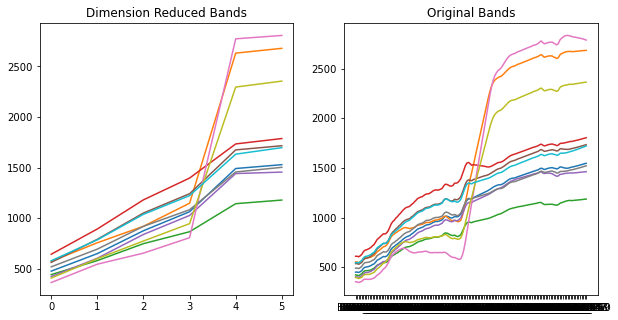

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.plot(final_arr[:10].T);
ax1.set_title('Dimension Reduced Bands')
ax2.plot(data[:10].T);
ax2.set_title('Original Bands');

In [236]:
final_df.to_csv('PCA_new_bands.csv')
np.save('PCA_reduced_data.npy',final_arr)

In [237]:
final_df.columns

Index(['Coastal', 'Blue', 'Green', 'Red', 'NIR', 'Extra'], dtype='object')

In [238]:
final_arr.shape

(1732, 6)